In [1]:
from dtcs.bulk_crn import *
from dtcs.spec.crn import *
from dtcs.bulk_crn.xps_io import *
from dtcs.bulk_crn.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
systems = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

multipliers = [0.1, 0.5, 1, 5, 10]

In [ ]:
sys = SolutionSystem([
    
])

In [2]:
# 100 mtorr, 25 deg C
sols = pickle.load(open('../data/nickel_constsv2_noexp.pkl', 'rb'))
x = read_new_data('../data/ag_100e-3_25.txt', be=0)

j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

systems.append(sols)

ModuleNotFoundError: No module named 'dtcs.homogenous_crn.solution'

In [3]:
# 100 mtorr, 300 deg C
sols = pickle.load(open('../data/ag_highp_hight_v2.pkl', 'rb'))

x = read_new_data('../data/ag_100e-3_300.txt', be=0)[0]
for i, s in enumerate(sols):    
    s.ignore = [y1]
    series = pd.Series(data=x.intensity, index=x.binding_energy)
    s.experimental = series

systems.append(sols)

In [4]:
# 0.01 mtorr, 25 deg C
sols = pickle.load(open('../data/ag_lowp_rt_v2.pkl', 'rb'))

x = read_new_data('../data/ag_1e-5_25.txt', be=1)[0]
for i, s in enumerate(sols):
    s.ignore = [y1]
    series = pd.Series(data=x.intensity, index=x.binding_energy)
    s.experimental = series
    
systems.append(sols)

In [6]:
# 30 mtorr, 25 deg C
sols = pickle.load(open('../data/ag_regp_rt.pkl', 'rb'))

x = read_new_data('../data/ag_30e-3_25.txt', be=0)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])
    
systems.append(sols)

In [5]:
sys = SolutionSystem(*systems)

scaling factor: 1264.9144992861245 	max index: 1


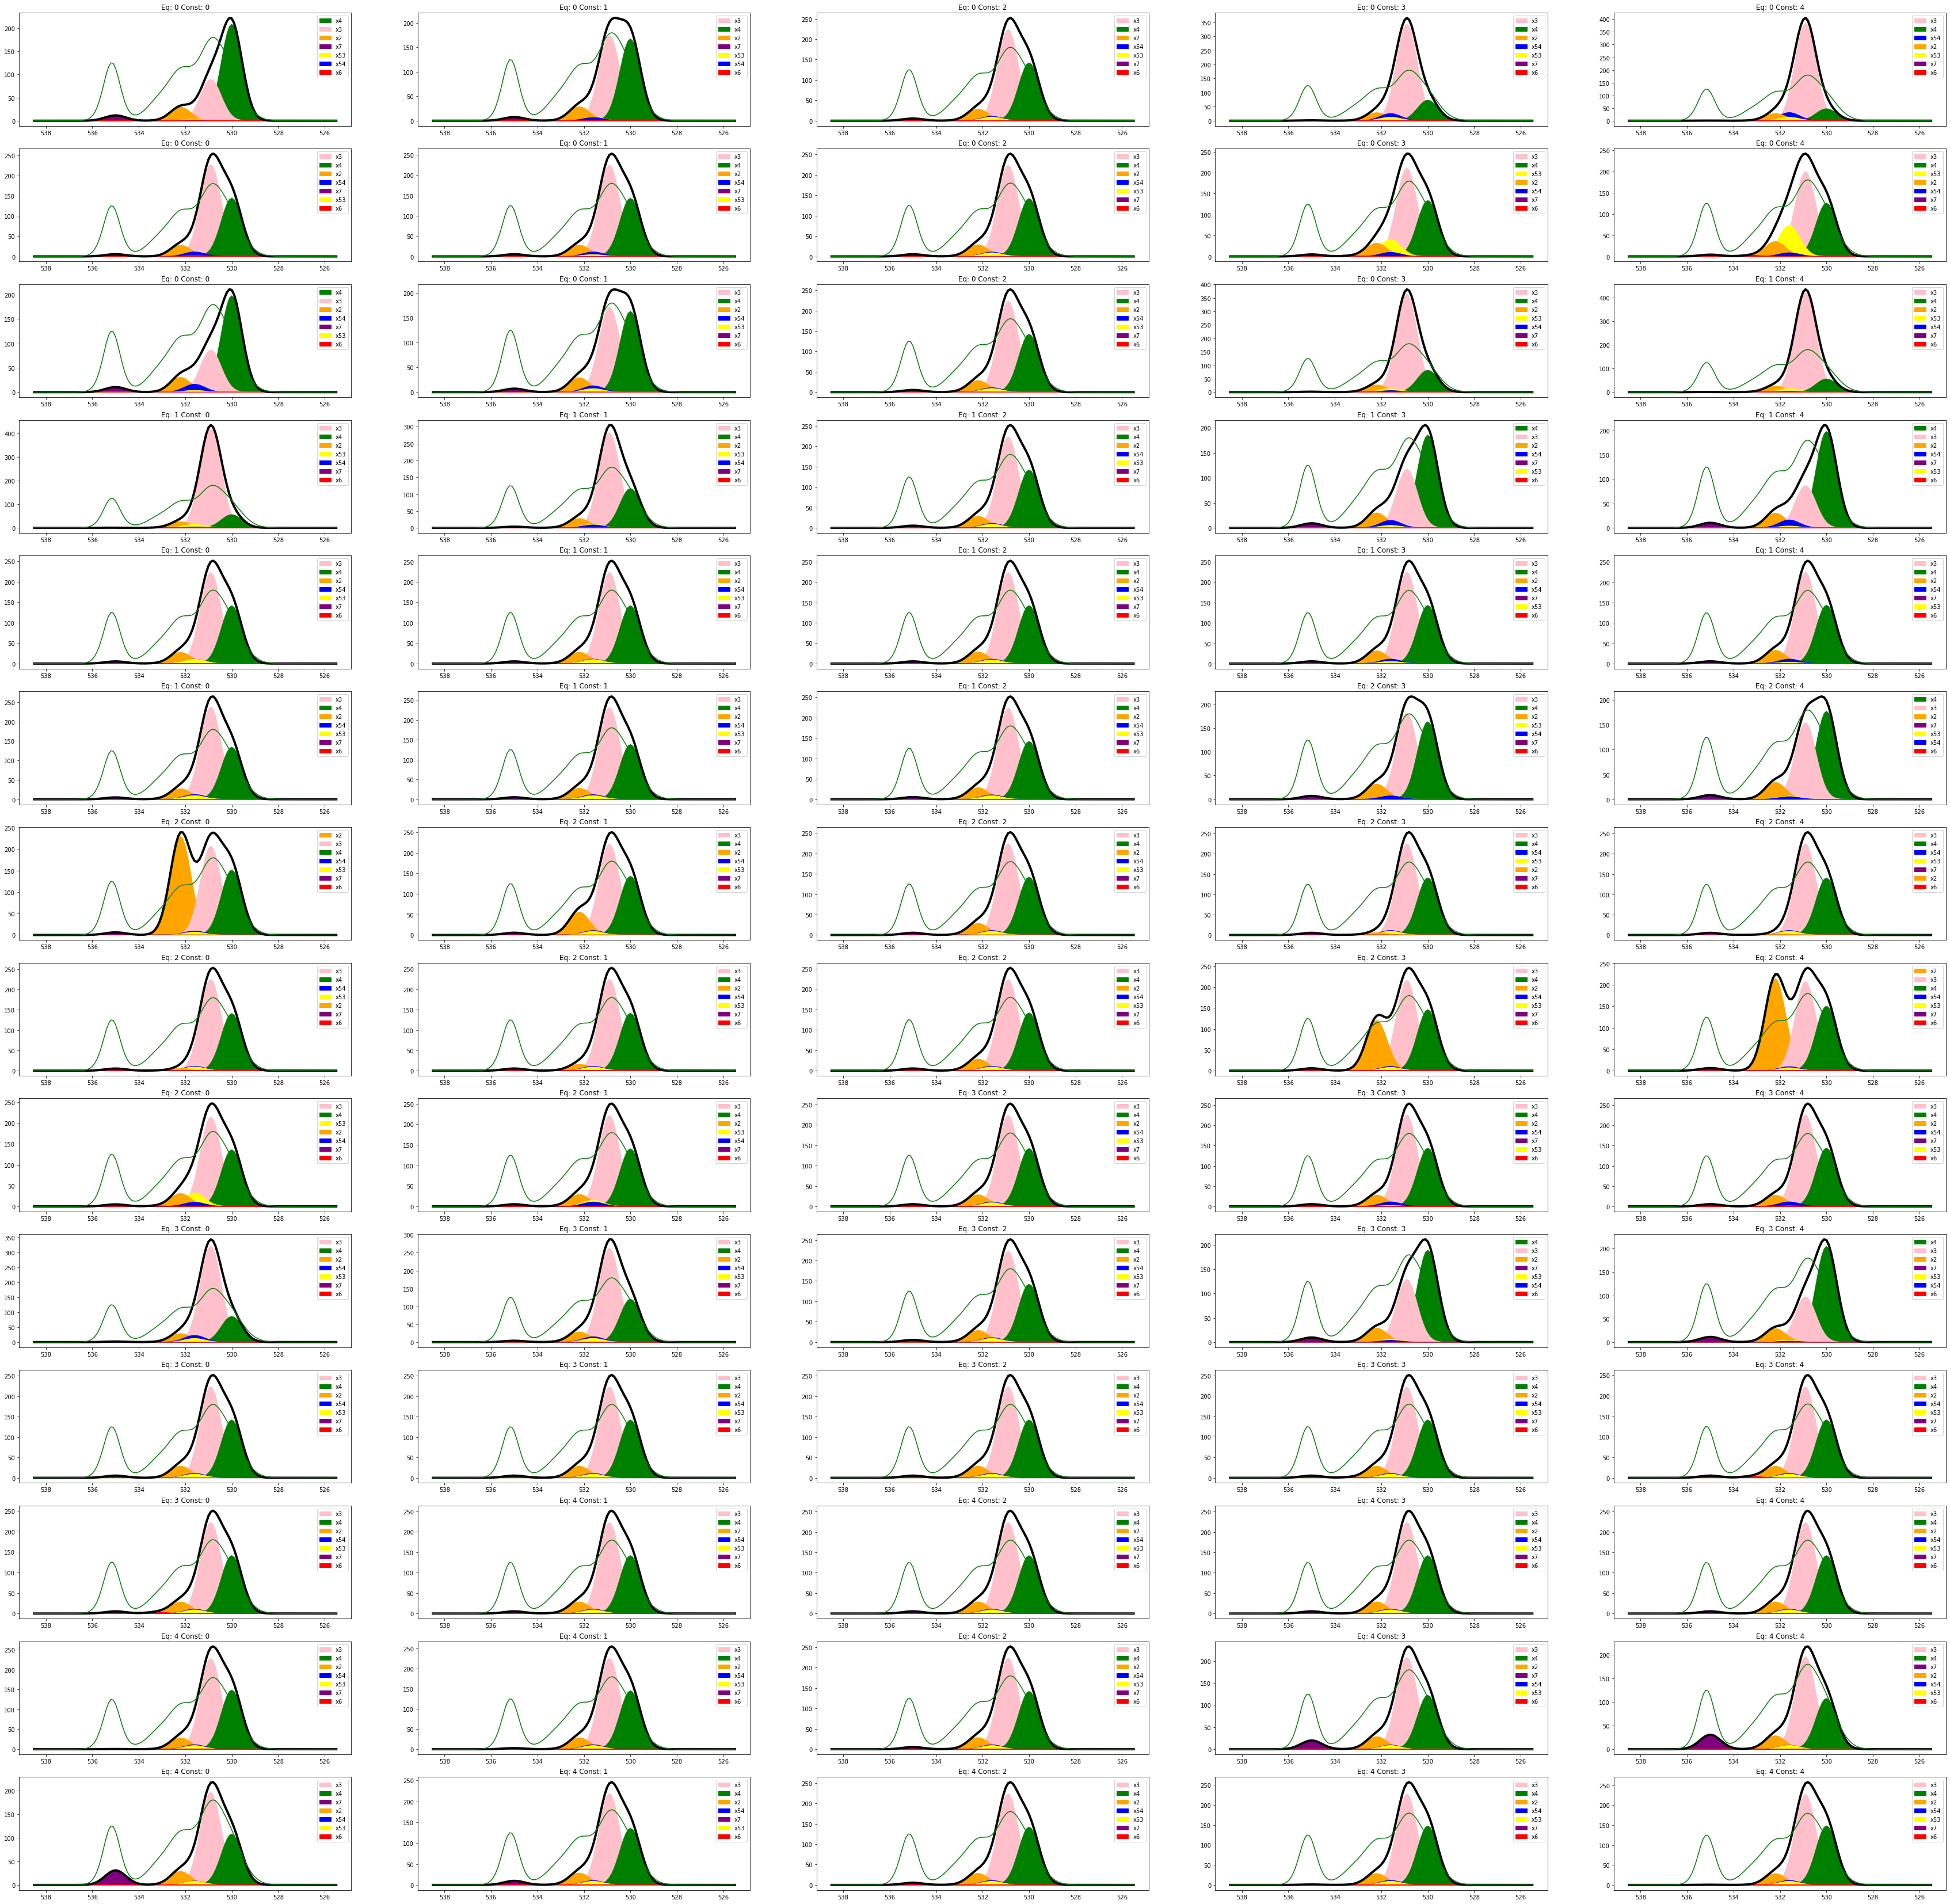

In [6]:
sys.plot(0, rows=14, cols=5)

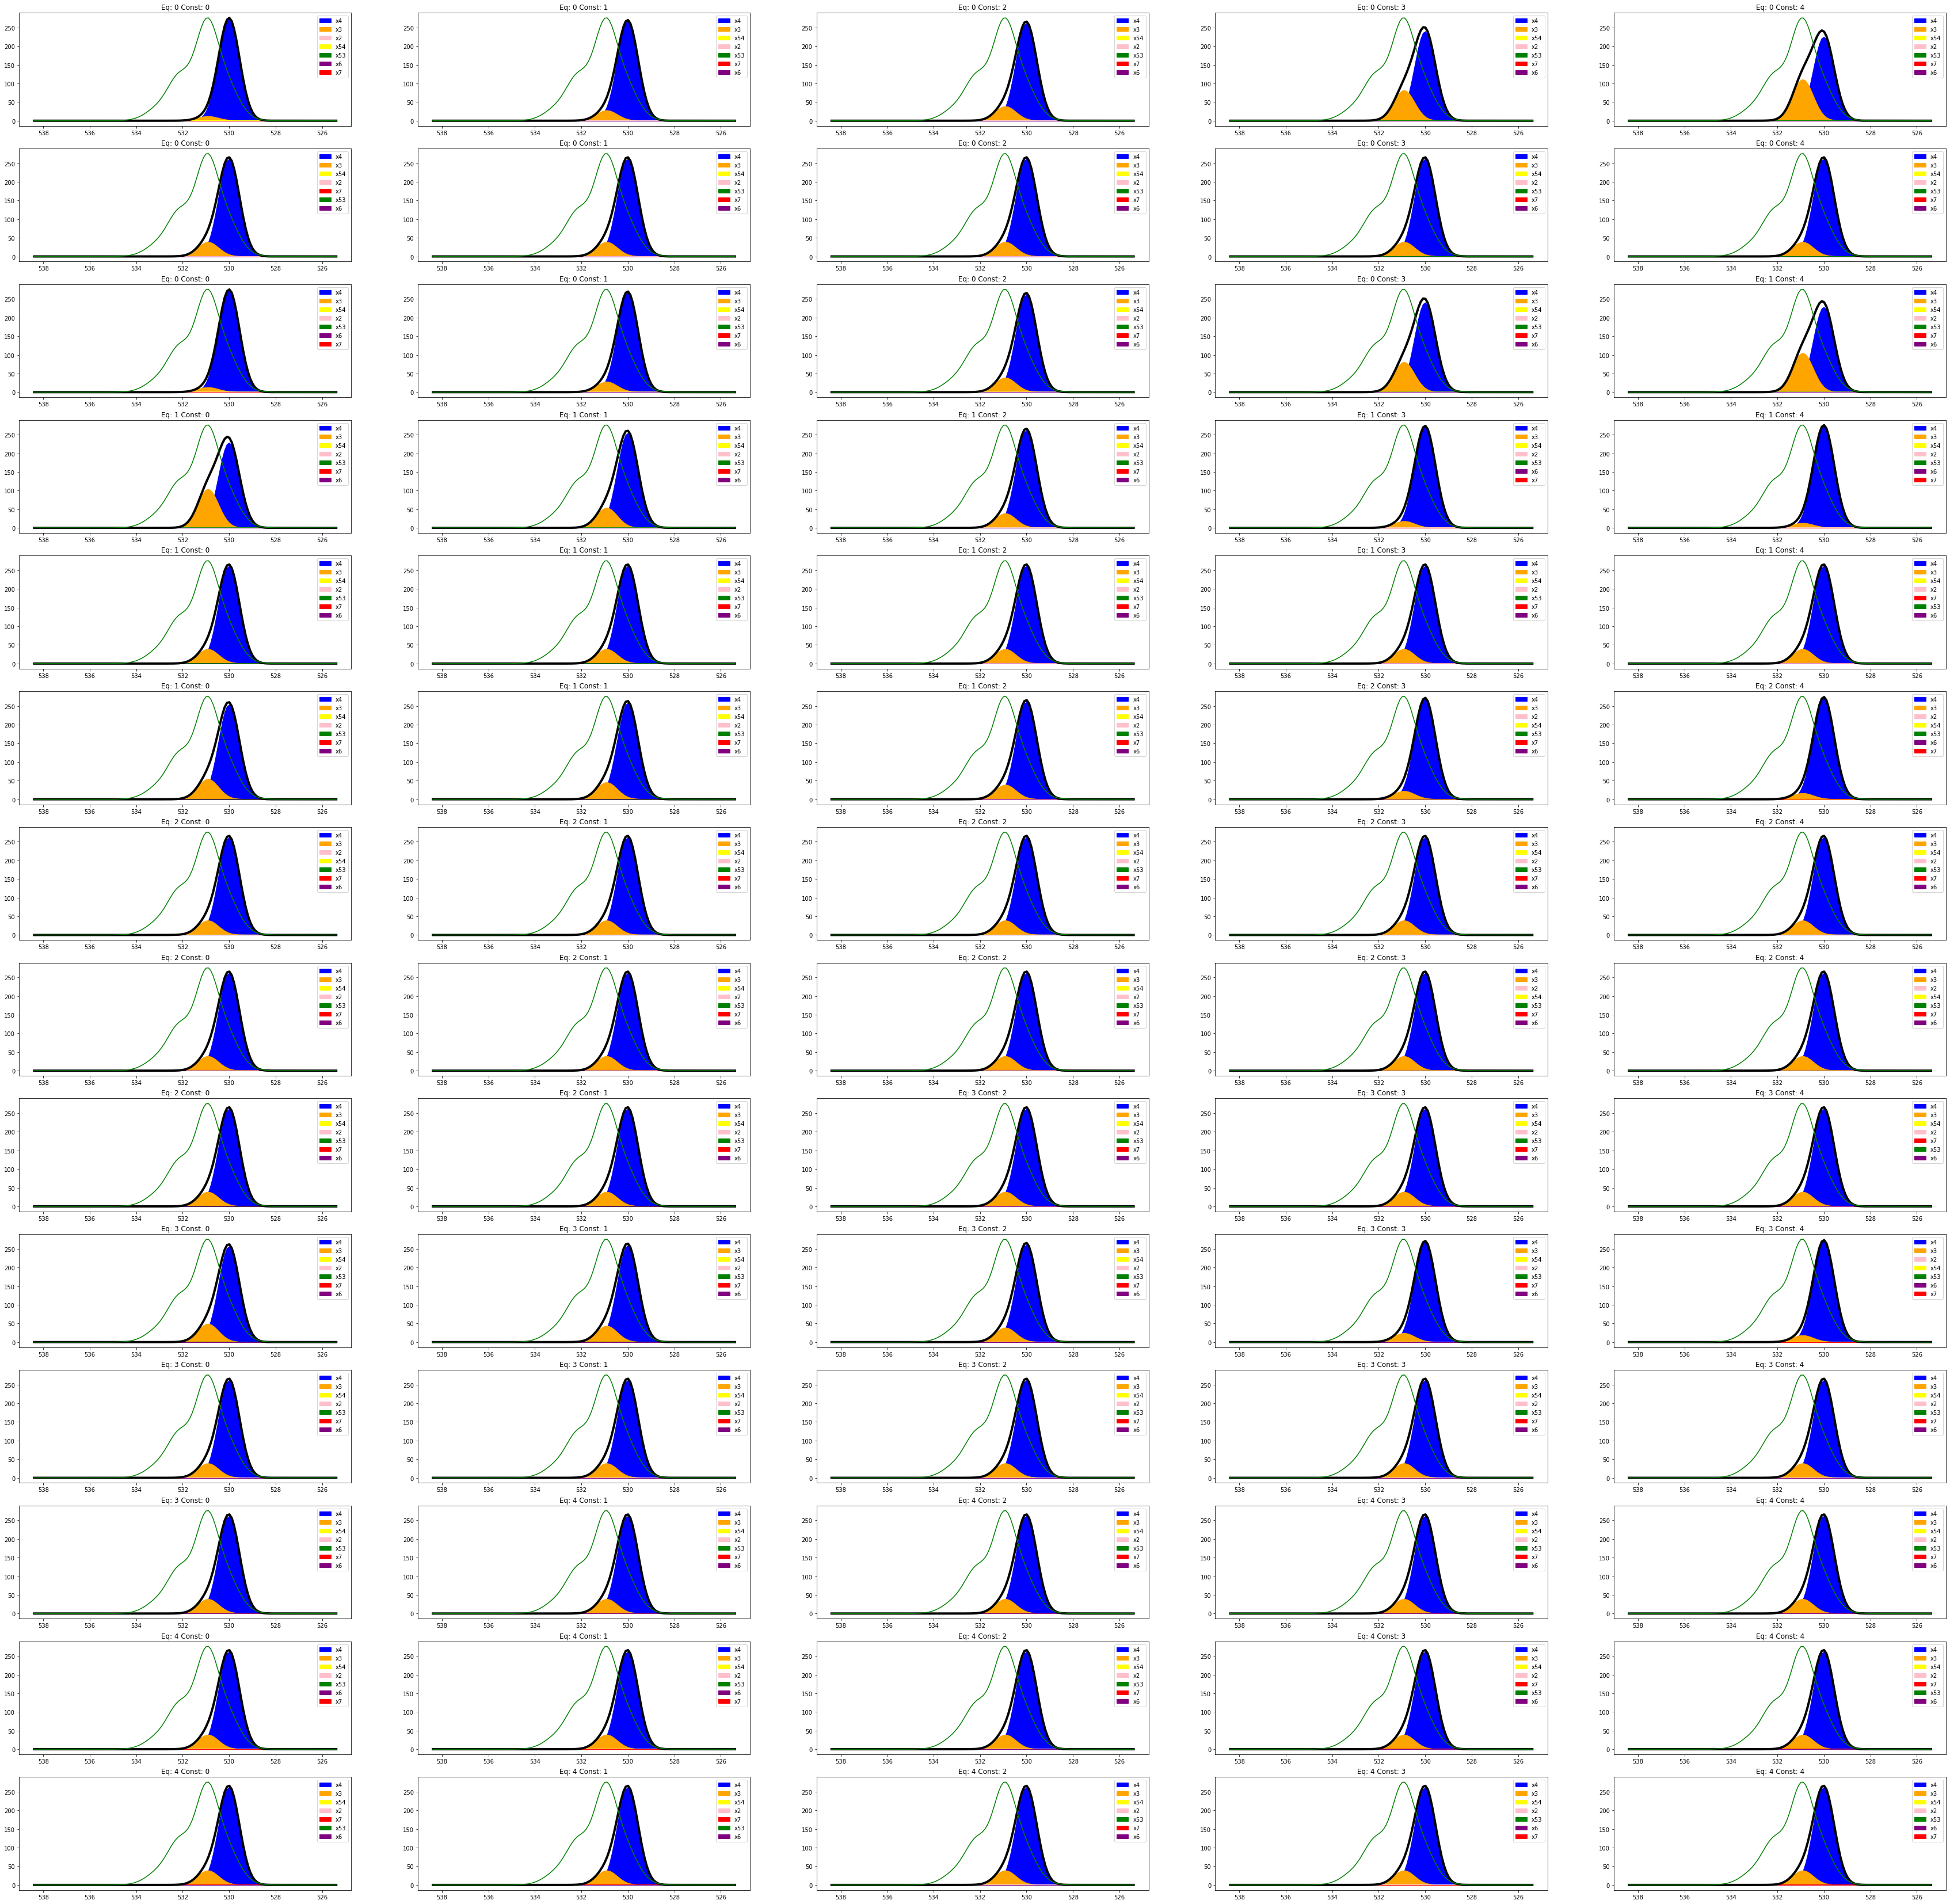

In [7]:
sys.plot(1, rows=14, cols=5)

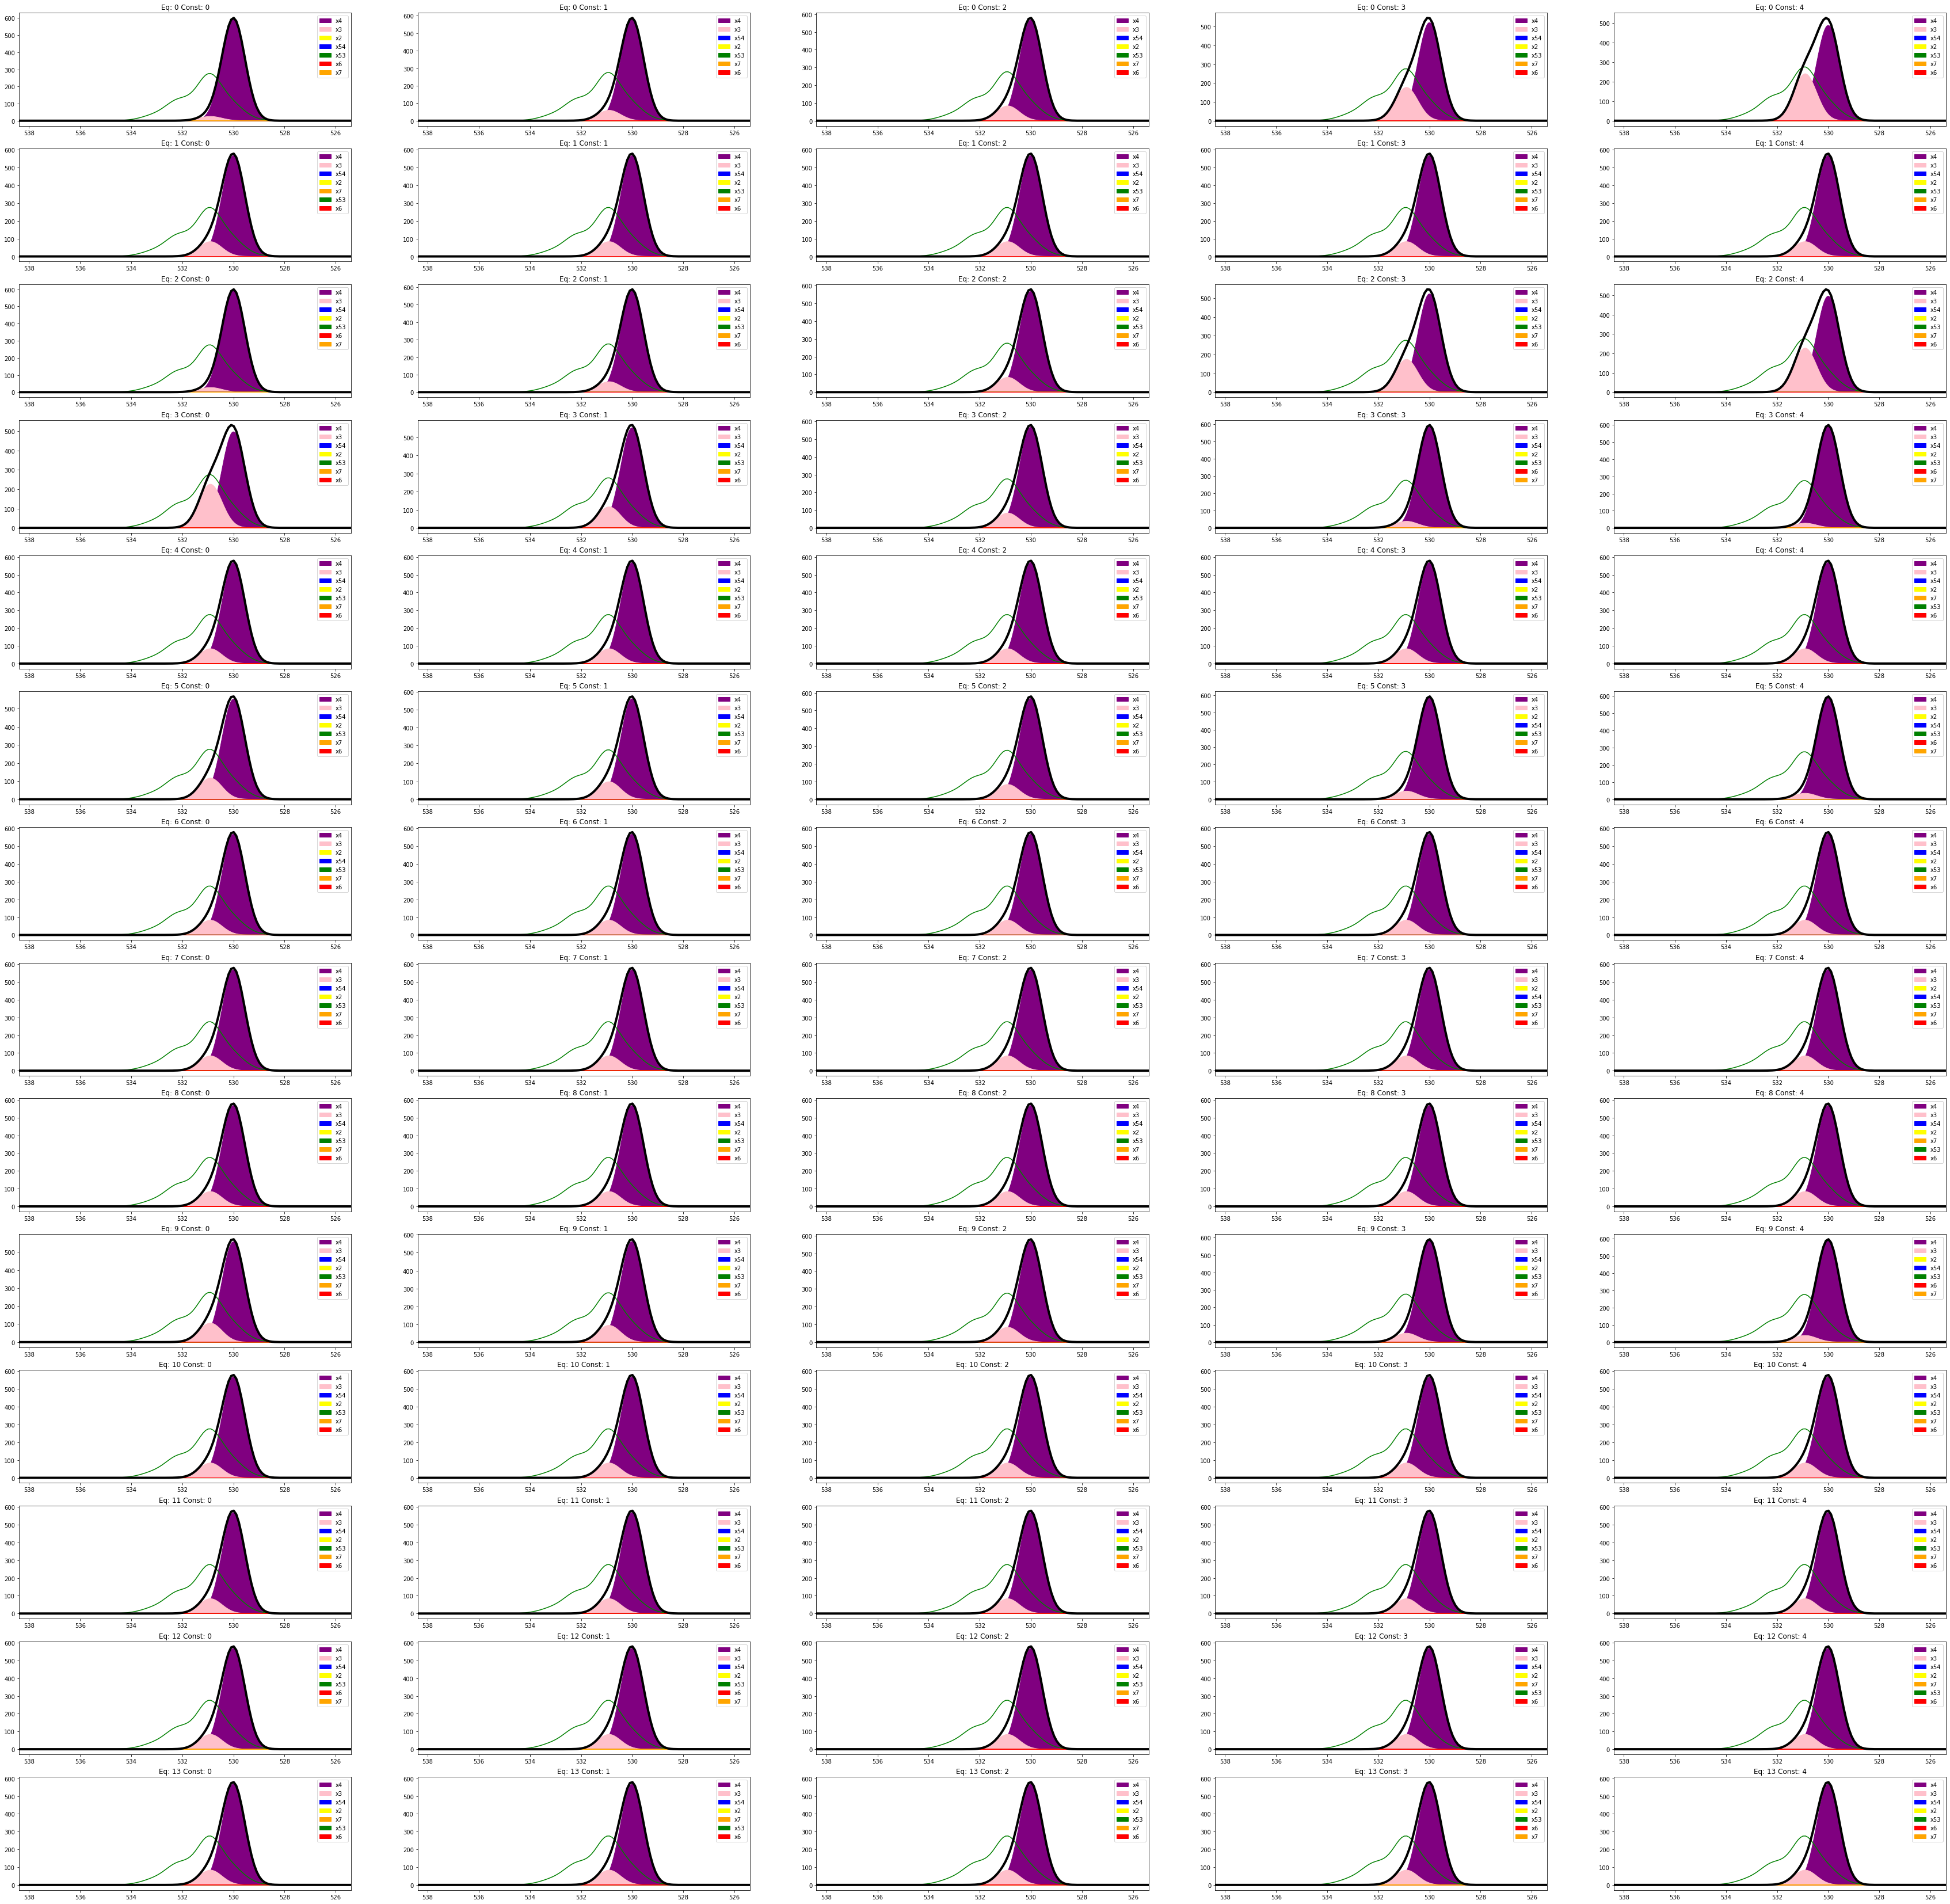

In [11]:
sys.plot(2, rows=14, cols=5)

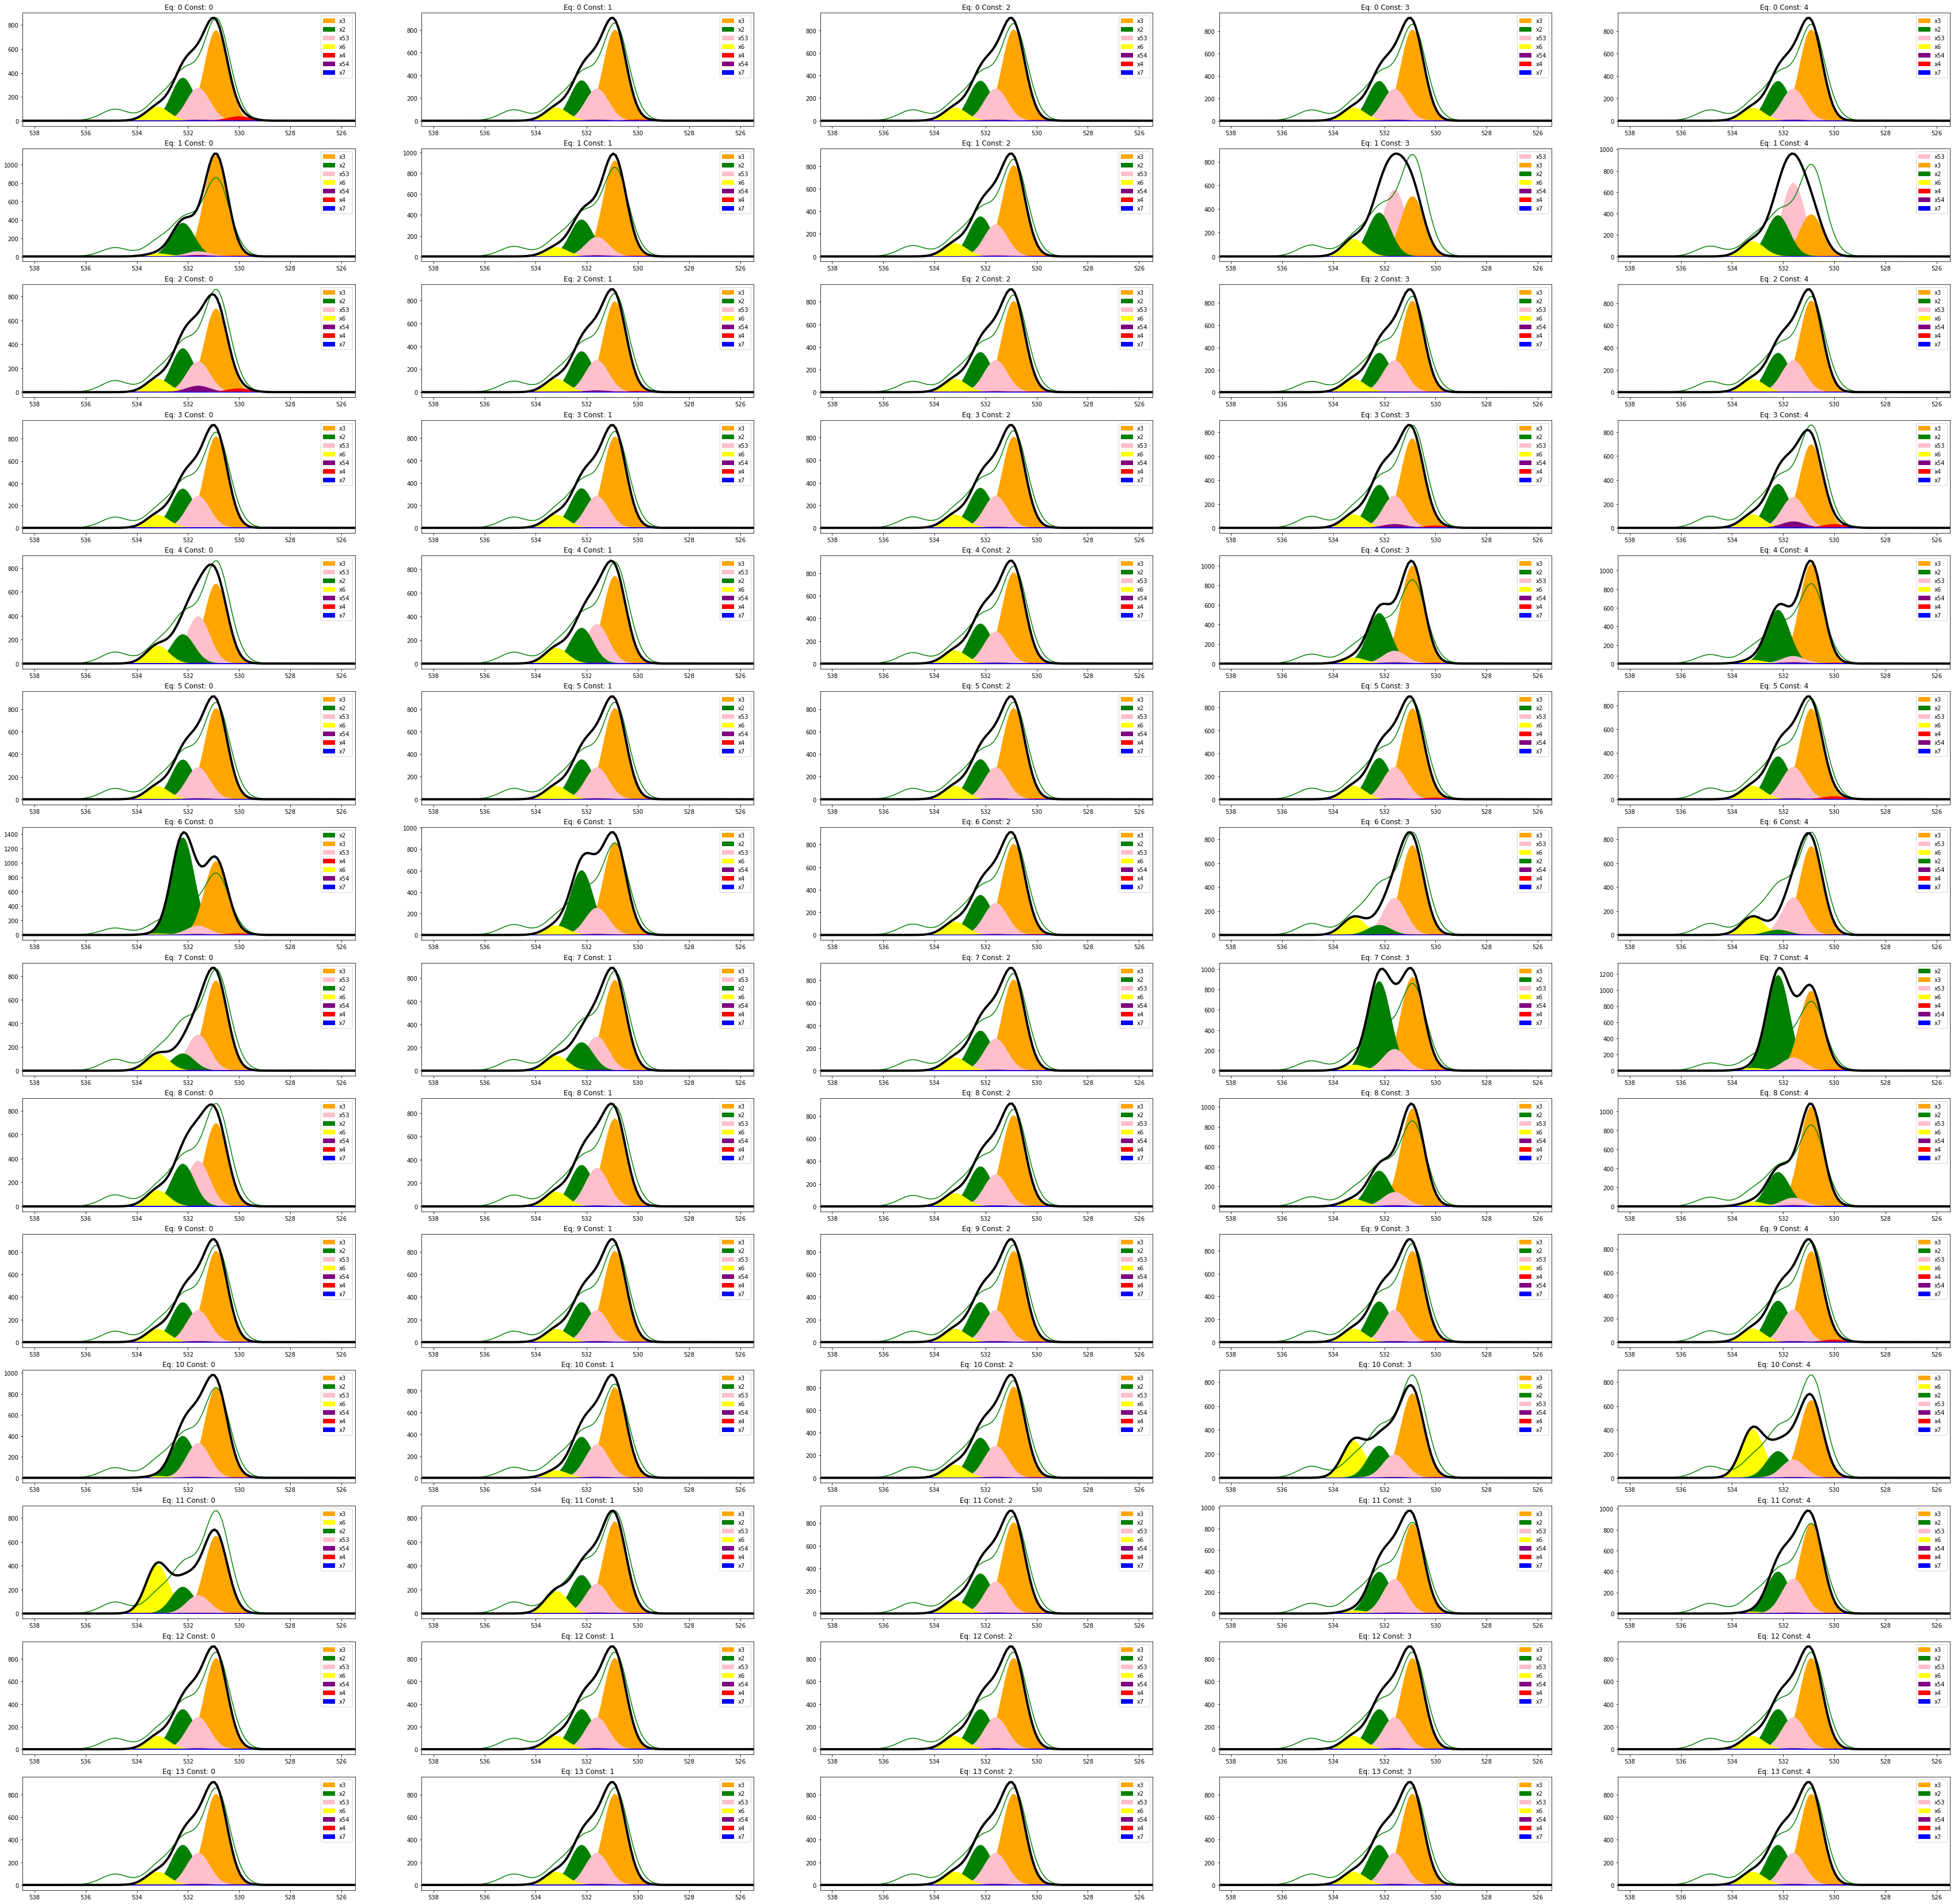

In [12]:
sys.plot(3, rows=14, cols=5)